In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tbo-hotels-dataset/hotels.csv


In [2]:
df = pd.read_csv("/kaggle/input/tbo-hotels-dataset/hotels.csv", encoding='latin-1')
df.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
0,AL,Albania,106078,Albanien,1003300,De Paris Hotel,FourStar,Nr. 7 Brigada Viii Street Tirane,NaN,Hotel de Paris is a charming boutique hotel th...,42268822,Private parking Parking onsite Television in c...,41.32213|19.81665,00355 4226 5009,1000,https://www.booking.com/hotel/al/de-paris.html
1,AL,Albania,106078,Albanien,1003301,Hotel Green,FourStar,Rruga Kavajes. Kombinat Km 2. Vaqarr VaqarrTir...,NaN,"Located in a suburb of Tirana, Hotel Green is ...",35548520058,airport pick up wifi available in all areas Ai...,41.30413|19.74703,+35548520057,1041,https://www.booking.com/hotel/al/hotel-green.html
2,AL,Albania,106078,Albanien,1003302,Theranda Hotel,ThreeStar,Rr. Andon Zako Cajupi Villa 6 & 7 Villa 6 & 7T...,NaN,"Set in Tirana, 1.2 km from Skanderbeg Square, ...",00355 (0)42273689,face masks for guests available all plates cu...,41.3216|19.81199,00355 (0)42273766,1019,https://www.booking.com/hotel/al/theranda.html
3,AL,Albania,106078,Albanien,1003303,Seven Hotel,ThreeStar,"KAVAJA STREET, CLOSE TURKISH AMBASSY TIRANA",Skanderbeg Square: within 500 metre,This hotel enjoys an enviable setting in Tiran...,NaN,À la carte dinner Breakfast buffet Breakfast C...,41.328027|19.815052,NaN,1001,http://www.hotelseven-tirana.com/
4,AL,Albania,106078,Albanien,1003325,Viktoria,ThreeStar,Rruga E Elbasanit Km 4 Sauk SaukTirana,NaN,Located in a new residential area at the edge ...,+355695406986,internet services Ironing service Family rooms...,41.29125|19.85349,355 69 5406986,1000,https://www.booking.com/hotel/al/viktoria-sauk...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010033 entries, 0 to 1010032
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   countyCode        1009121 non-null  object
 1    countyName       1010033 non-null  object
 2    cityCode         1010033 non-null  int64 
 3    cityName         1010033 non-null  object
 4    HotelCode        1010033 non-null  int64 
 5    HotelName        1010033 non-null  object
 6    HotelRating      1010033 non-null  object
 7    Address          1009931 non-null  object
 8    Attractions      484941 non-null   object
 9    Description      963028 non-null   object
 10   FaxNumber        449686 non-null   object
 11   HotelFacilities  959655 non-null   object
 12   Map              1009103 non-null  object
 13   PhoneNumber      682896 non-null   object
 14   PinCode          979054 non-null   object
 15   HotelWebsiteUrl  759915 non-null   object
dtypes: int64(2), objec

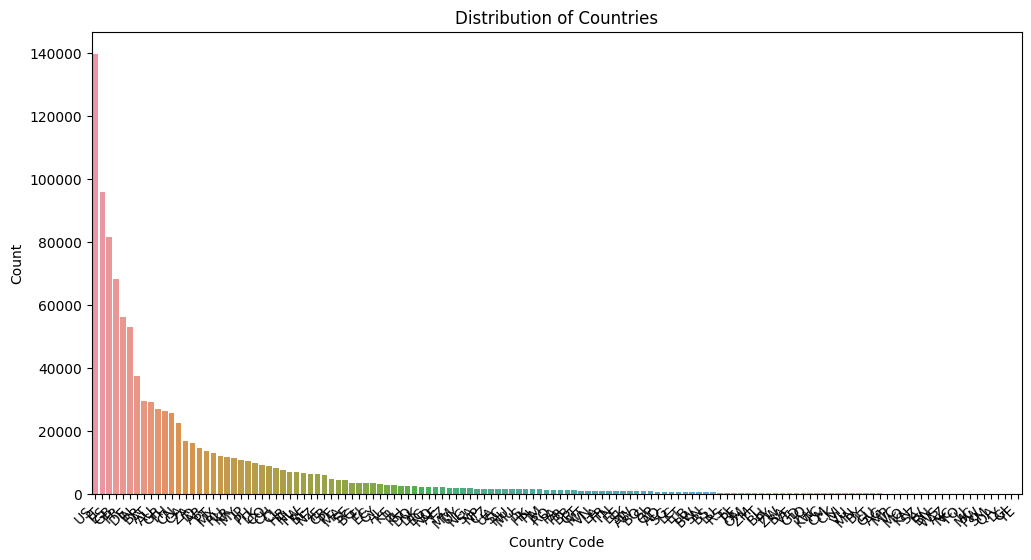

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='countyCode', order=df['countyCode'].value_counts().index)
plt.title('Distribution of Countries')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [5]:
unique_countries = df[' countyName'].unique()
print("Unique Countries:", unique_countries)

Unique Countries: ['Albania' 'Andorra' 'Antigua' 'Argentina' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Bolivia'
 'Bosnia Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria'
 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'China' 'Colombia' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'French Polynesia' 'Germany' 'Gibraltar' 'Greece'
 'Grenada' 'Guadeloupe' 'Guam' 'Guatemala' 'Hong Kong' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Ireland(Republic of)' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kenya' 'Kuwait' 'Laos' 'Latvia' 'Lebanon' 'Libya'
 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Macau' 'Malaysia' 'Malta'
 'Mauritius' 'Mexico' 'Monaco' 'Mongolia' 'Morocco' 'Myanmar' 'Namibia'
 'Nepal' 'Netherlands' 'New Caledonia' 'New Zealand' 'Nigeria'
 'Northern Mariana Isl' 'Norway' 'Oman' 'Palau' 'Panama' 'Paraguay' 'P

In [6]:
unique_country_codes = df['countyCode'].unique()
print("Unique Country Codes:", unique_country_codes)

Unique Country Codes: ['AL' 'AD' 'AG' 'AR' 'AW' 'AU' 'AT' 'AZ' 'BS' 'BH' 'BB' 'BY' 'BE' 'BO'
 'BA' 'BW' 'BR' 'BN' 'BG' 'KH' 'CM' 'CA' 'CL' 'CN' 'CO' 'CK' 'CR' 'HR'
 'CY' 'CZ' 'DK' 'DO' 'EC' 'EG' 'EE' 'ET' 'FJ' 'FI' 'FR' 'PF' 'DE' 'GI'
 'GR' 'GD' 'GP' 'GU' 'GT' 'HK' 'HU' 'IS' 'IN' 'ID' 'IE' 'IL' 'IT' 'JM'
 'JP' 'JO' 'KE' 'KW' 'LA' 'LV' 'LB' 'LY' 'LI' 'LT' 'LU' 'MO' 'MY' 'MT'
 'MU' 'MX' 'MC' 'MN' 'MA' 'MM' nan 'NP' 'NL' 'NC' 'NZ' 'NG' 'MP' 'NO' 'OM'
 'PW' 'PA' 'PY' 'PE' 'PH' 'PL' 'PT' 'PR' 'QA' 'RO' 'RU' 'WS' 'SM' 'SA'
 'SN' 'RS' 'SC' 'SG' 'SK' 'SI' 'ZA' 'KR' 'ES' 'LK' 'KN' 'LC' 'VC' 'SZ'
 'SE' 'CH' 'TW' 'TZ' 'TH' 'TO' 'TT' 'TN' 'TR' 'TC' 'UA' 'AE' 'GB' 'US'
 'UY' 'VU' 'VE' 'VN' 'VI' 'YE' 'ZM' 'ZW']


In [7]:
df1 = df[df['countyCode'] == 'ID']
df1.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
387441,ID,Indonesia,100110,Ababi,1026153,Pondok Batur Indah Homestay,ThreeStar,Desa Ababi Tirtagangga Karangasem TirtaganggaK...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Water Palace of Tirtagangga...,+6236322342,Dry cleaning/laundry service Airport transport...,-8.416068|115.581053,62-0363-22342,80852,http://www.pondokbaturindah.com/
387442,ID,Indonesia,100110,Ababi,1026321,Tirta Ayu Hotel & Restaurant,ThreeStar,Tirtagangga The Water Palace TirtaganggaThe Wa...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Water Palace of Tirtagangga...,62-363-22503,Free parking nearby Pool umbrellas Natural poo...,-8.411944|115.58741,+6236322503,80852,http://www.hoteltirtagangga.com
387443,ID,Indonesia,100110,Ababi,1623963,Pondok Alam Bukit,OneStar,Tirtagangga Desa AbabiKarangasem 80852,NaN,Pondok Alam Bukit is situated in Tirtagangga a...,NaN,Parking Room service 24-hour front desk Garden...,-8.41095|115.58584,NaN,80852,https://www.booking.com/hotel/id/pondok-alam-b...
387444,ID,Indonesia,100110,Ababi,1818307,Pandan House,All,Pikat-tirta Gangga-amlapura Bali-karangasemCan...,NaN,Situated a few steps from Tirta Gangga Water P...,NaN,Free self parking Garden Non-smoking rooms Air...,-8.41206|115.58738,NaN,56849,https://www.booking.com/hotel/id/pandan-house....
387445,ID,Indonesia,100110,Ababi,1930386,Padoba Mimpi House,All,Tanah Lengis Ababi,NaN,NaN,NaN,NaN,-8.40925|115.58467,NaN,80852,NaN


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14589 entries, 387441 to 402029
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   countyCode        14589 non-null  object
 1    countyName       14589 non-null  object
 2    cityCode         14589 non-null  int64 
 3    cityName         14589 non-null  object
 4    HotelCode        14589 non-null  int64 
 5    HotelName        14589 non-null  object
 6    HotelRating      14589 non-null  object
 7    Address          14589 non-null  object
 8    Attractions      8970 non-null   object
 9    Description      13898 non-null  object
 10   FaxNumber        7048 non-null   object
 11   HotelFacilities  13950 non-null  object
 12   Map              14573 non-null  object
 13   PhoneNumber      10974 non-null  object
 14   PinCode          14252 non-null  object
 15   HotelWebsiteUrl  9886 non-null   object
dtypes: int64(2), object(14)
memory usage: 1.9+ MB


In [9]:
unique_city_name = df1[' cityName'].unique()
print("Unique City Name:", unique_city_name)

Unique City Name: ['Ababi' 'Ambon' 'Amed' 'Anyer' 'Bajawa' 'Baki' 'Bali' 'Balikpapan'
 'Banda Aceh' 'Bandar Lampung' 'Bandung' 'Bandungan' 'Bangka Island'
 'Banjarbaru' 'Banjarmasin' 'Banjarnegara' 'Banyuwangi' 'Batam Island'
 'Batu' 'Batu Aji' 'Batu Ampar' 'Batu Karas' 'Batu Layar' 'Batuan'
 'Batulicin' 'Baturaden' 'Baturiti' 'Bau-Bau' 'Bedugul' 'Bekasi'
 'Bengkulu' 'Berau' 'Biak' 'Bima' 'Bintan Island' 'Bira' 'Bitung' 'Blitar'
 'Bogor' 'Bohorok' 'Bojonegoro' 'Bondalem' 'Bondowoso' 'Bontang'
 'Borobudur' 'Boyolali' 'Brastagi' 'Bukit Lawang' 'Bukittinggi'
 'Bumi Serpong Damai' 'Bunaken Isand' 'Bunutan' 'Carita Beach'
 'Ceningan Island' 'Cepu' 'Ciamis' 'Cianjur' 'Ciater' 'Cikarang' 'Cilacap'
 'Cilegon' 'Cipanas' 'Cirebon' 'Cisarua' 'Curugrendeng' 'Demak' 'Depok'
 'Dumai' 'Duri' 'Ende' 'Flores' 'Gangga Island' 'Garut' 'Gili Air'
 'Gili Meno' 'Gili Sudak' 'Gili Trawangan' 'Gorontalo' 'Halmahera'
 'Ijen Nationalpark' 'Indramayu' 'Insel Nusa Penida' 'Jakarta' 'Jambi'
 'Jatingaleh' 'Java' 'J

In [10]:
selected_cities = ['Kotabaru,   Yogyakarta', 'Sleman', 'Wukirsari', 'Yogyakarta']
df_yog = df1[df1[' cityName'].isin(selected_cities)]

df_yog.head()

,countyCode,countyName,cityCode,cityName,HotelCode,HotelName,HotelRating,Address,Attractions,Description,FaxNumber,HotelFacilities,Map,PhoneNumber,PinCode,HotelWebsiteUrl
395682,ID,Indonesia,151201,"Kotabaru, Yogyakarta",1221432,Le Krasak Boutique Hotel,ThreeStar,Jl. Krasak No. 9 Tugu Jogja Tugu JogjaYogyakar...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : Near Kota Gede</p><p>Location : ...,62-274-517745,Dry cleaning/laundry service Luggage storage M...,-7.788924|110.372674,+62 274 580619,55224,http://www.le-krasak.com/
395683,ID,Indonesia,151201,"Kotabaru, Yogyakarta",1400062,Hotel Graha Kinasih Kotabaru,OneStar,Jalan Ungaran No 1 Kotabaru Yogyakarta 55224Ko...,NaN,A 15-minute drive from the royal palace of Yog...,NaN,linens towels and laundry washed in accordanc...,-7.78747|110.37066,(0274) 515844,55224,https://www.booking.com/hotel/id/graha-kinasih...
395684,ID,Indonesia,151201,"Kotabaru, Yogyakarta",1482789,Ndalem Fatiha Guest House,OneStar,Jalan Palagan Tentara Pelajar Km. 7 Yogyakarta,NaN,Ndalem Fatiha Guest House is a popular choice ...,NaN,Wi-Fi in public areas family room car park Smo...,-7.78703|110.378,NaN,NaN,http://ndalem-fatiha-guest-house.yogyakartahot...
395685,ID,Indonesia,151201,"Kotabaru, Yogyakarta",1483467,Rumah Teras Yogyakarta,TwoStar,Jalan Raya Rejodani Behind Redjodani MarketNga...,Distances are displayed to the nearest 0.1 mil...,<p>HeadLine : In Ngaglik</p><p>Location : Loca...,NaN,Outdoor pool Smoke-free property,-7.707315|110.39242,62-21-80681198,55581,NaN
395686,ID,Indonesia,151201,"Kotabaru, Yogyakarta",1483698,Ndalem Joglo Hinggil Private Villa,OneStar,"Jalan Kaliurang, Km 20 HargobinangunPakemYogya...",NaN,The 1-star Ndalem Joglo Hinggil Private Villa ...,NaN,coffee shop tours 24-hour room service meeting...,-7.78703|110.378,NaN,55582,NaN


In [11]:
df_yog.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 395682 to 402029
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   countyCode        603 non-null    object
 1    countyName       603 non-null    object
 2    cityCode         603 non-null    int64 
 3    cityName         603 non-null    object
 4    HotelCode        603 non-null    int64 
 5    HotelName        603 non-null    object
 6    HotelRating      603 non-null    object
 7    Address          603 non-null    object
 8    Attractions      378 non-null    object
 9    Description      582 non-null    object
 10   FaxNumber        329 non-null    object
 11   HotelFacilities  590 non-null    object
 12   Map              603 non-null    object
 13   PhoneNumber      484 non-null    object
 14   PinCode          584 non-null    object
 15   HotelWebsiteUrl  423 non-null    object
dtypes: int64(2), object(14)
memory usage: 80.1+ KB


In [12]:
missing_values = df_yog.isnull().sum()
print(missing_values)

countyCode            0
 countyName           0
 cityCode             0
 cityName             0
 HotelCode            0
 HotelName            0
 HotelRating          0
 Address              0
 Attractions        225
 Description         21
 FaxNumber          274
 HotelFacilities     13
 Map                  0
 PhoneNumber        119
 PinCode             19
 HotelWebsiteUrl    180
dtype: int64


In [13]:
df_yog = df.copy()

In [14]:
# Using .loc[] to avoid SettingWithCopyWarning
df_yog.loc[:, ' Address'] = df_yog[' Address'].fillna('Address not available')
df_yog.loc[:, ' Attractions'] = df_yog[' Attractions'].fillna('No attractions nearby')
df_yog.loc[:, ' Description'] = df_yog[' Description'].fillna('Description not available')
df_yog.loc[:, ' HotelFacilities'] = df_yog[' HotelFacilities'].fillna('Facilities not specified')
df_yog.loc[:, ' PinCode'] = df_yog[' PinCode'].fillna('000000')

In [15]:
missing_values = df_yog.isnull().sum()
print(missing_values)

countyCode             912
 countyName              0
 cityCode                0
 cityName                0
 HotelCode               0
 HotelName               0
 HotelRating             0
 Address                 0
 Attractions             0
 Description             0
 FaxNumber          560347
 HotelFacilities         0
 Map                   930
 PhoneNumber        327137
 PinCode                 0
 HotelWebsiteUrl    250118
dtype: int64


In [16]:
unique_hotel_rating = df_yog[' HotelRating'].unique()
print("Unique Hotel Rating:", unique_hotel_rating)

Unique Hotel Rating: ['FourStar' 'ThreeStar' 'All' 'FiveStar' 'TwoStar' 'OneStar']


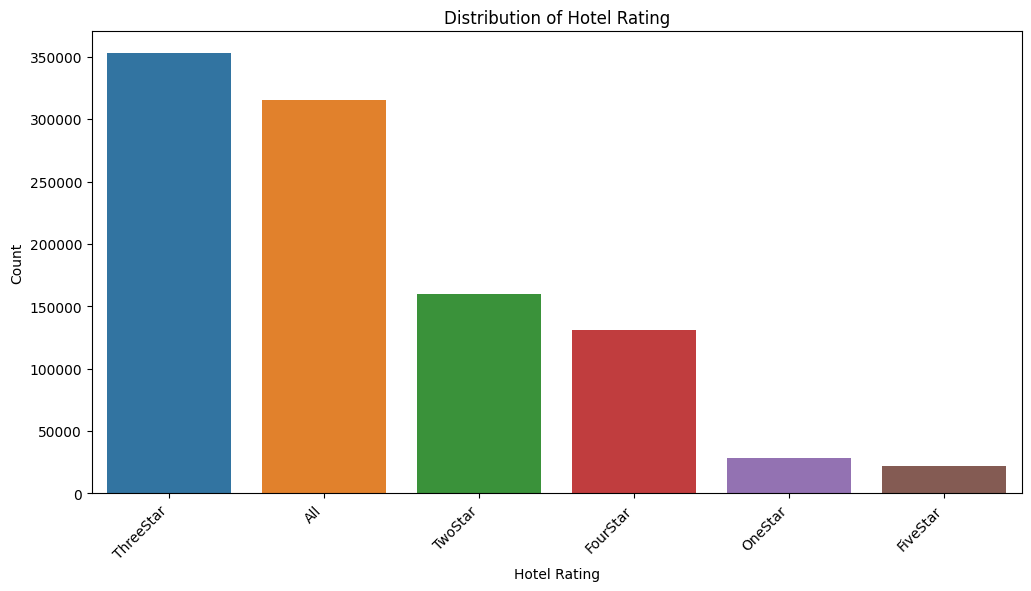

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_yog, x=' HotelRating', order=df_yog[' HotelRating'].value_counts().index)
plt.title('Distribution of Hotel Rating')
plt.xlabel('Hotel Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()